# Logistic Regression 

In [48]:
# Import all libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [49]:
#Inport File
df = pd.read_csv('C:/Users/choub/Downloads/Car insurance claim/Car insurance claim.csv')
pd.set_option('display.max_columns', 25)

In [50]:
# Display the data
print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0
5,743146596,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,$0,17.0,0
6,871024631,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,"$2,946",7.0,1
7,792300541,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,"$8,780",1,z_SUV,no,$0,0,No,0,$0,1.0,0
8,7945239,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,"$6,477",1.0,1
9,3577610,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,$0,10.0,0


In [51]:
display(df.describe())

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [52]:
# Check for missing values
print("Missing values in each column:")
display(df.isna().sum())

Missing values in each column:


ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

In [53]:
# Drop rows with missing values
df.dropna(inplace=True)

In [54]:
# Drop irrelevant columns
columns_to_drop = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'PARENT1', 'HOME_VAL', 
                   'MSTATUS', 'GENDER', 'EDUCATION', 'TIF', 'RED_CAR']
df.drop(columns=columns_to_drop, inplace=True)

In [55]:
# Separate features and target
X = df.iloc[:, 1:-1] 
Y = df.iloc[:, -1]   

In [56]:
# encode categorical variables
categorical_columns = ['OCCUPATION', 'CAR_USE', 'CAR_TYPE']
X = pd.get_dummies(X, columns=categorical_columns)

In [57]:
# Convert currency columns to numeric (remove '$' and ',')
def clean_currency(column):
    return column.str.replace('$', '').str.replace(',', '').astype(int)

currency_columns = ['INCOME', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']
for col in currency_columns:
    X[col] = clean_currency(X[col])

In [58]:
# Encode the 'REVOKED' column using LabelEncoder
labelencoder = LabelEncoder()
X['REVOKED'] = labelencoder.fit_transform(X['REVOKED'])

In [59]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [60]:
# train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [61]:
predictions = log_reg.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00       448

    accuracy                           1.00      1532
   macro avg       1.00      1.00      1.00      1532
weighted avg       1.00      1.00      1.00      1532

Confusion Matrix:


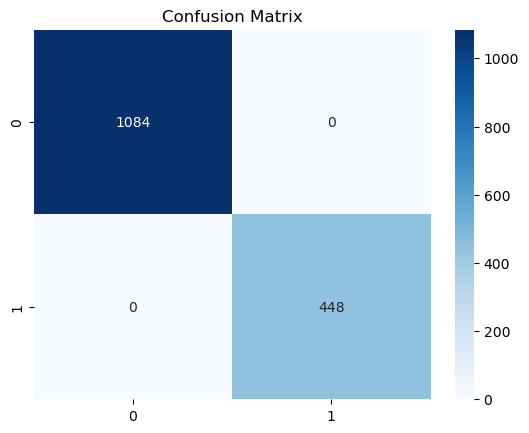

Accuracy Score: 1.0


In [62]:
# Display evaluation metrics
print("Classification Report:")
print(classification_report(Y_test, predictions))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score:", accuracy_score(Y_test, predictions))

In [21]:
# Plot feature importance based on coefficients of logistic regression
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient')

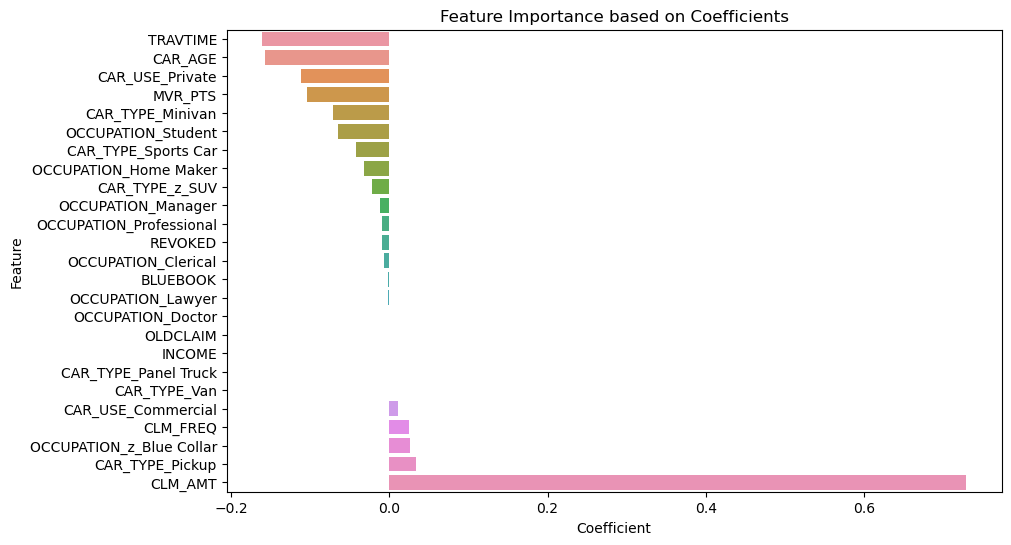

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance based on Coefficients')
plt.show()